<a href="https://colab.research.google.com/github/lawalAfeez820/NLP/blob/main/hotel_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import re
import string
import spacy
nlp=spacy.load("en_core_web_sm")
import gensim
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#loading and reading the data into pandas dataframe

review_df=pd.read_csv("train.csv",skiprows=[11305])

review_df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
# checking for null value
for i in review_df.columns:
    if review_df.loc[:,i].isnull().sum()>0:
        print(i)

In [ ]:
# to fix contraction issue
!pip install contractions
import contractions

def fix_contraction(sentence):
    sentence=sentence.lower()
    return contractions.fix(sentence)

review_df["fixed contractions"]=review_df["Description"].apply(fix_contraction)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#spliting the data into two,for the good and bad comment to 
#check for word that can help during the training before preprocessing

def extract(type):
    
    df=review_df[review_df["Is_Response"]==type]
    return df

In [ ]:
# function wordcloud


   
    
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        
        stopwords=[""],
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    

    


In [ ]:
# showing the frequency of each word with a table

import nltk
nltk.download('punkt')

def counts(text):

    df=TextBlob(str(text)).word_counts
    df=pd.DataFrame({"word":list(df.keys()),"count":list(df.values())})
    return df.sort_values("count",ascending=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Exploring Not Happy sentiment before removing the stopwords

In [ ]:
# not happy

not_happy=extract("not happy")
not_happy.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,fixed contractions
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,the room was kind of clean but had a very stro...
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,i stayed at the crown plaza april -- - april -...
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,i booked this hotel through hotwire at the low...
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,my girlfriends and i stayed here to celebrate ...
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,not happy,my husband and i have stayed in this hotel a f...


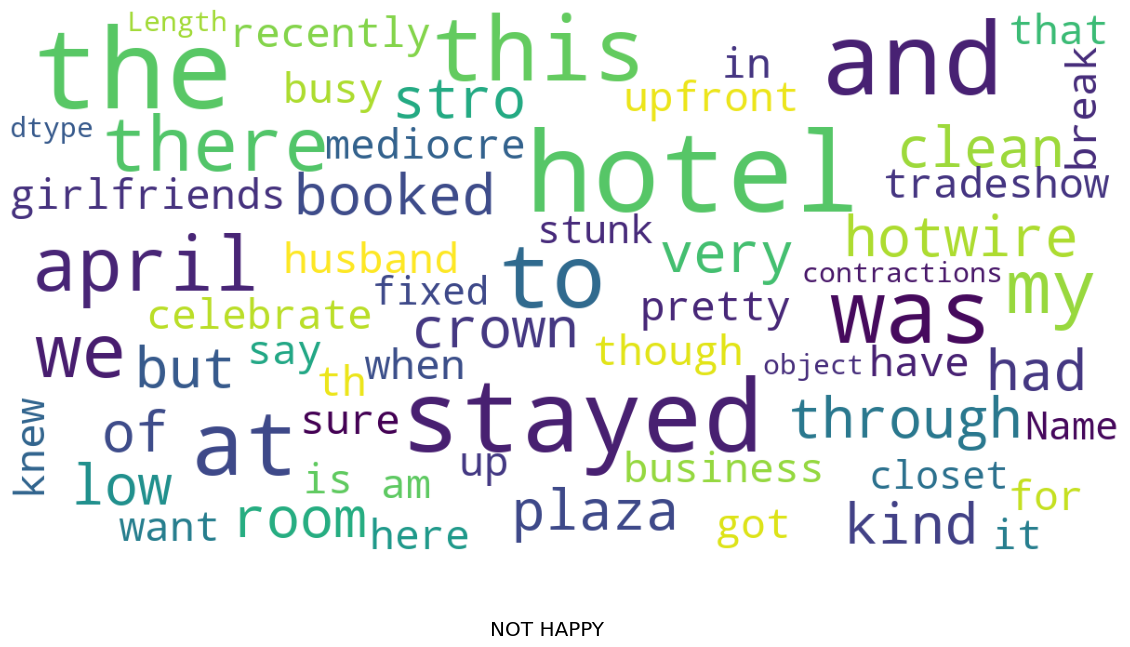

In [ ]:

# print wordcloud
show_wordcloud(not_happy["fixed contractions"],"NOT HAPPY")

In [ ]:
counts(not_happy["fixed contractions"])

,word,count
13,i,7
1,the,5
9,a,5
22,hotel,5
14,stayed,4
...,...,...
38,11291,1
40,say,1
41,upfront,1
42,that,1


# Exploring Happy sentiment before text preprocessing to see the importance words

In [ ]:
# happy

happy=extract("happy")
happy.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,fixed contractions
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,stayed here with husband and sons on the way t...
5,id10331,We had - rooms. One was very nice and clearly ...,InternetExplorer,Desktop,happy,we had - rooms. one was very nice and clearly ...
7,id10333,My wife & I stayed in this glorious city a whi...,Google Chrome,Mobile,happy,my wife & i stayed in this glorious city a whi...
8,id10334,My boyfriend and I stayed at the Fairmont on a...,Internet Explorer,Desktop,happy,my boyfriend and i stayed at the fairmont on a...
10,id10336,"Steps off Times Square, nice rooms, stayed - n...",Internet Explorer,Tablet,happy,"steps off times square, nice rooms, stayed - n..."


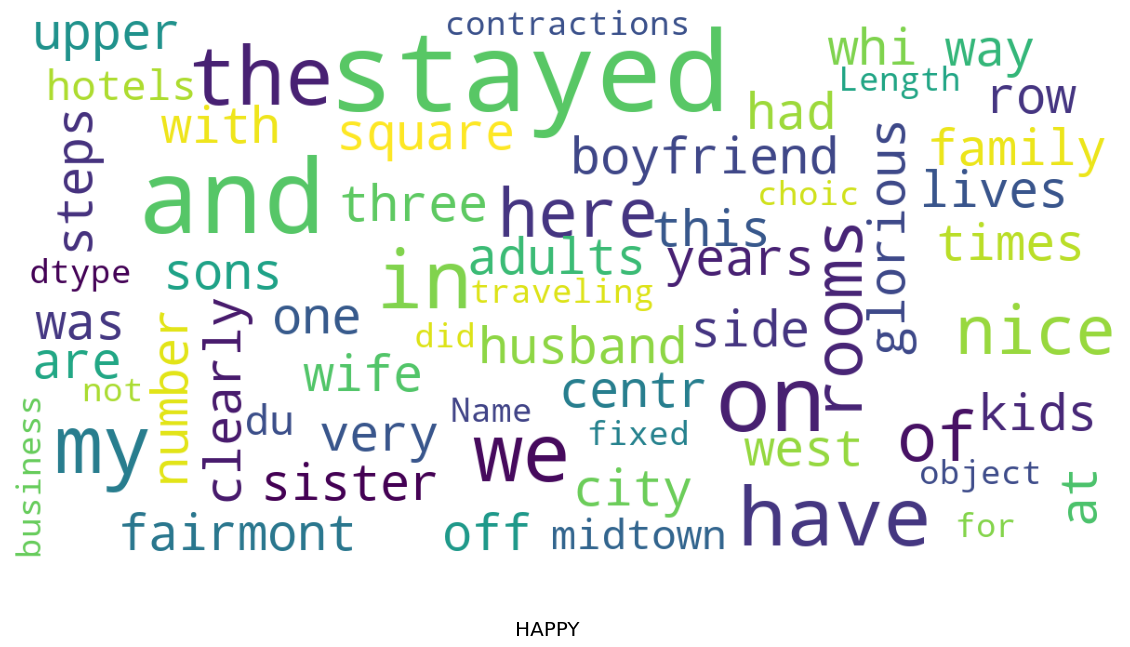

In [ ]:
# print wordcloud
show_wordcloud(happy["fixed contractions"],"HAPPY")


In [ ]:
counts(happy["fixed contractions"])

,word,count
1,stayed,6
28,a,6
5,and,5
7,on,4
23,i,4
...,...,...
37,times,1
39,n,1
40,11296,1
42,years,1


## All the exloration above were done to confirm if some stopwords are impacting the output, since none has effect on the data, we can peacefully remove them

# DATA PREPROCESSING

In [ ]:
import nltk
nltk.download('stopwords')
stopword=list(stopwords.words("english"))
stopword.remove("no")
stopword.remove("not")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocessing(sentence):
  
    stopword=set(stopwords.words("english"))
    stopword.discard("no")
    stopword.discard("not")
    pattern=re.compile("[^A-Za-z ]")

    sentence=sentence.lower()
    sentence=fix_contraction(sentence)
    sentence=pattern.sub(" ",sentence)
    
    

    Word_in_sentence=word_tokenize(sentence)
    join_sentence=[list(nlp(word).sents)[0].lemma_ for word in Word_in_sentence if word not in stopword]
   
    joined_sentence=" ".join(join_sentence)
    return joined_sentence

# Applying the preprocessing function to the description column


In [ ]:
# selecting at random,4000 examples for each response

happy_review=review_df[review_df["Is_Response"]=="happy"].sample(4000)


In [ ]:
not_happy_review=review_df[review_df["Is_Response"]=="not happy"]

In [ ]:
review_df=pd.concat([happy_review,not_happy_review]).sample(frac=1,random_state=100)
review_df.head(10)

,User_ID,Description,Browser_Used,Device_Used,Is_Response,fixed contractions
7517,id17843,My trip to NYC was AMAZING!!! I had such a won...,IE,Desktop,not happy,my trip to nyc was amazing!!! i had such a won...
5147,id15473,I am very impressed with the staff of this hot...,Google Chrome,Mobile,happy,i am very impressed with the staff of this hot...
3853,id14179,Right next to The Village shops and Southpark ...,Firefox,Desktop,happy,right next to the village shops and southpark ...
4435,id14761,The best thing about the hotel is the price an...,Firefox,Mobile,not happy,the best thing about the hotel is the price an...
10284,id20610,On the --nd November I got back from a - day s...,Edge,Desktop,not happy,on the --nd november i got back from a - day s...
7162,id17488,I traveled to New York with my son and husband...,Google Chrome,Mobile,happy,i traveled to new york with my son and husband...
2096,id12422,"I stayed at the Hotel Abri in September, for o...",Firefox,Tablet,not happy,"i stayed at the hotel abri in september, for o..."
1374,id11700,I needed to go to LA to get a French visa and ...,Edge,Tablet,not happy,i needed to go to la to get a french visa and ...
5477,id15803,Absolutely HORRIBLE place. Quite possibly the ...,Mozilla,Mobile,not happy,absolutely horrible place. quite possibly the ...
855,id11181,We had to attend a family wedding in New York ...,Google Chrome,Mobile,happy,we had to attend a family wedding in new york ...


In [ ]:
import time
start=time.time()
review_df["Description"]=review_df["Description"].apply(preprocessing)
end=time.time()
print(end-start)

2378.1820166110992


In [ ]:
 review_df.head()

,Description,Is_Response,fixed contractions
5151,book arlington night read review trip advisor ...,not happy,we booked at the arlington for - nights after ...
27530,historic beautifully appoint hotel one block m...,happy,a very historic beautifully appointed hotel on...
9606,hotel clean update relatively new room furnitu...,not happy,if this hotel were cleaner and updated with re...
23840,hotel locate minute walk alamo hotel pretty go...,happy,this hotel is located about - minute walk to t...
20008,spend night great hotel staff helpful breakfas...,happy,we spent - nights at this great hotel - the st...


In [ ]:
review_df.to_csv(r"description.csv",index=False)

# doing some exporation after the preprocessing

In [ ]:
# happy

happy=extract("happy")
happy.head()

,Description,Is_Response,fixed contractions
27530,historic beautifully appoint hotel one block m...,happy,a very historic beautifully appointed hotel on...
23840,hotel locate minute walk alamo hotel pretty go...,happy,this hotel is located about - minute walk to t...
20008,spend night great hotel staff helpful breakfas...,happy,we spent - nights at this great hotel - the st...
2591,absolutely love stay library hotel perfect lit...,happy,we absolutely loved our stay at the library ho...
14154,would say nice expect quite great design great...,happy,i would have to say this was nicer than what i...


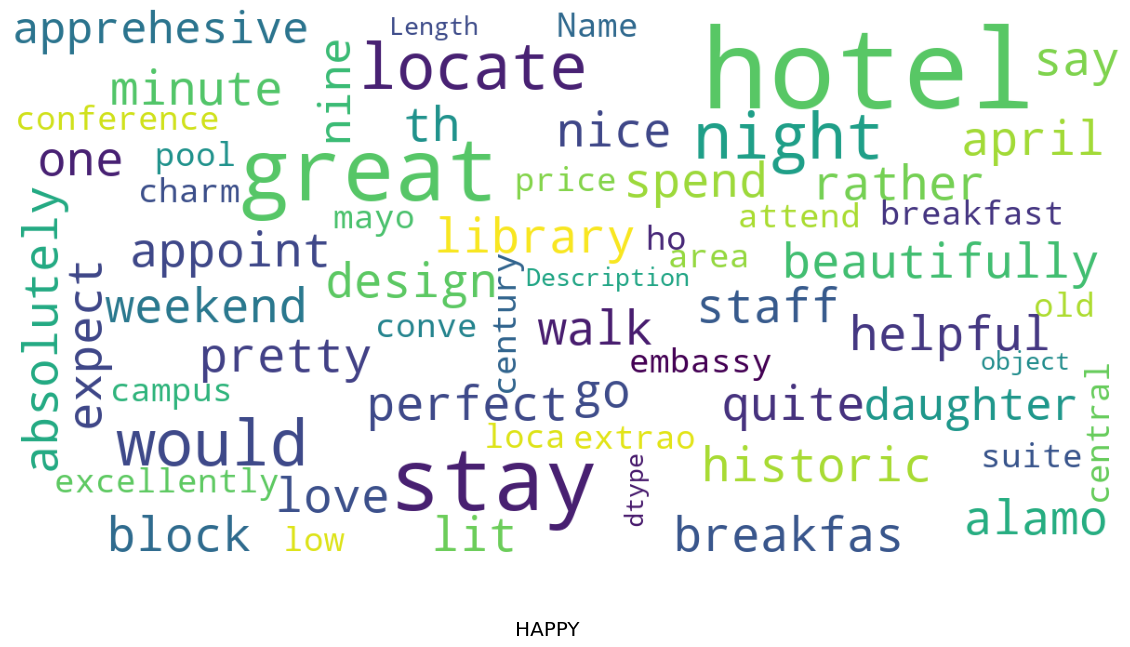

In [ ]:
# print wordcloud
show_wordcloud(happy["Description"],"HAPPY")

In [ ]:
counts(happy["Description"])

,word,count
4,hotel,7
25,stay,4
18,great,4
30,would,2
17,night,2
...,...,...
34,quite,1
35,design,1
36,18705,1
1,historic,1


In [ ]:
#not happy

not_happy=extract("not happy")
not_happy.head()

,Description,Is_Response,fixed contractions
5151,book arlington night read review trip advisor ...,not happy,we booked at the arlington for - nights after ...
9606,hotel clean update relatively new room furnitu...,not happy,if this hotel were cleaner and updated with re...
11410,give one price cheap hotel reserve upon check ...,not happy,i was given one price on cheap hotels when i r...
20407,second time hotel choose affordable pet friend...,not happy,"this was our second time in the hotel, and we ..."
4448,wife stay hilmton two night business trip over...,not happy,my wife and i stayed at the hilmton for two ni...


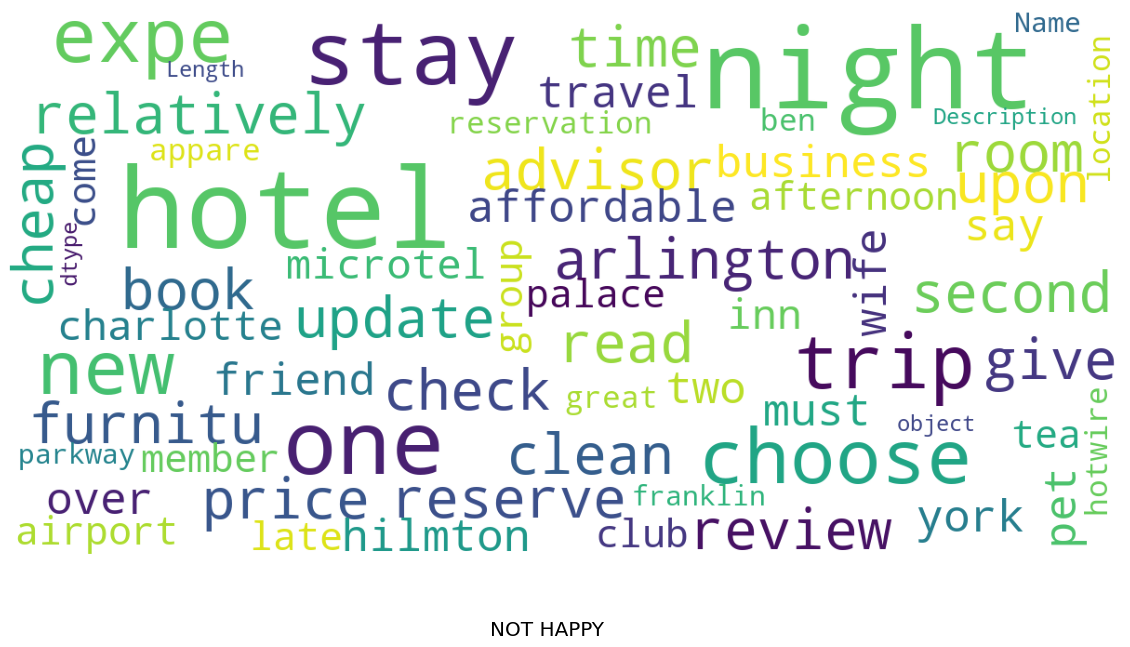

In [ ]:
# print wordcloud
show_wordcloud(not_happy["Description"],"NOT HAPPY")

In [ ]:
counts(not_happy["Description"])

,word,count
3,night,5
9,hotel,5
18,one,3
33,stay,3
43,expe,2
...,...,...
35,two,1
36,business,1
1,book,1
38,14662,1


# VECTORIZING

In [ ]:
review_df=pd.read_csv("/content/description.csv",skiprows=[7152])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:

vector=TfidfVectorizer(ngram_range=(1,1))
vector.fit(review_df["Description"])

TfidfVectorizer()

In [ ]:
len((vector.vocabulary_))

16421

In [ ]:
description_vector=vector.transform(review_df["Description"]).toarray()

In [ ]:
# model initailizing

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()  



In [ ]:
#model fitting and taking happy to be 1 and not happy as zero
review_df["Is_Response"]=review_df["Is_Response"].map({"happy":1,"not happy":0})
model.fit(description_vector,review_df["Is_Response"]) 

LogisticRegression()

# MODEL Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
pred=model.predict(description_vector)
accuracy_score(pred,review_df["Is_Response"])
pred

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
roc_auc_score(pred,review_df["Is_Response"])

0.9095807557814688

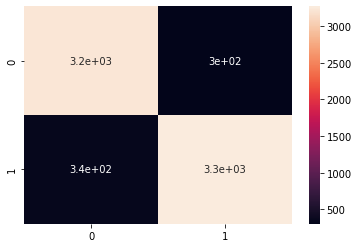

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(pred,review_df["Is_Response"]),color="red" ,annot=True);

In [ ]:
PREDICTIONS

In [ ]:
text="It is a nice hotel and i promise to pratrinize it"


In [ ]:
text=pd.Series(text)
text=text.apply(preprocessing)
text=vector.transform(text)



In [ ]:
if model.predict(text)[0]==1:
  print("GOOD SENTIMENT")
else:
  print("BAD SENTIMENT")

GOOD SENTIMENT


In [ ]:
text="This hotel is just nonsense "




In [ ]:
text=pd.Series(text)
text=text.apply(preprocessing)
text=vector.transform(text)

In [ ]:
if model.predict(text)[0]==1:
  print("GOOD SENTIMENT")
else:
  print("BAD SENTIMENT")

BAD SENTIMENT
